
**Название проекта**
Анализ рынка компьютерных игр
_____
**Описание исследования.**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
_____
**Цель исследования.**

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий 2017 год.

_____
**Задачи исследования.**

* Выбрать потенциально прибыльные платформы
* Выбрать потенциально прибыльные жанры
* Изучить связь оценок критиков и пользователей с уровнем продаж игр
* Составить портрет типового пользователя в регионах EU, NA, JP

_____
**Исходные данные.**

Исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.
______

**Данное исследование разделим на несколько частей.**

***[Часть 1. Изучение общей информации](#section1)***

***[Часть 2. Подготовка данных](#section2)***

***[Часть 3. Исследовательский анализ данных](#section3)***

***[Часть 4. Портрет потребителя в региона NA, JP, EU](#section4)***

***[Часть 5. Проверка гипотез](#section5)***

***[Часть 6. Общий вывод](#section4)***








In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st


<a id='section1'></a>
### 1 Откроем файл с данными и изучим общую информацию



In [124]:
try:
    df = pd.read_csv('games.csv')
except FileNotFoundError as e:
    print(repr(e))
    df = pd.read_csv('/datasets/games.csv')

df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


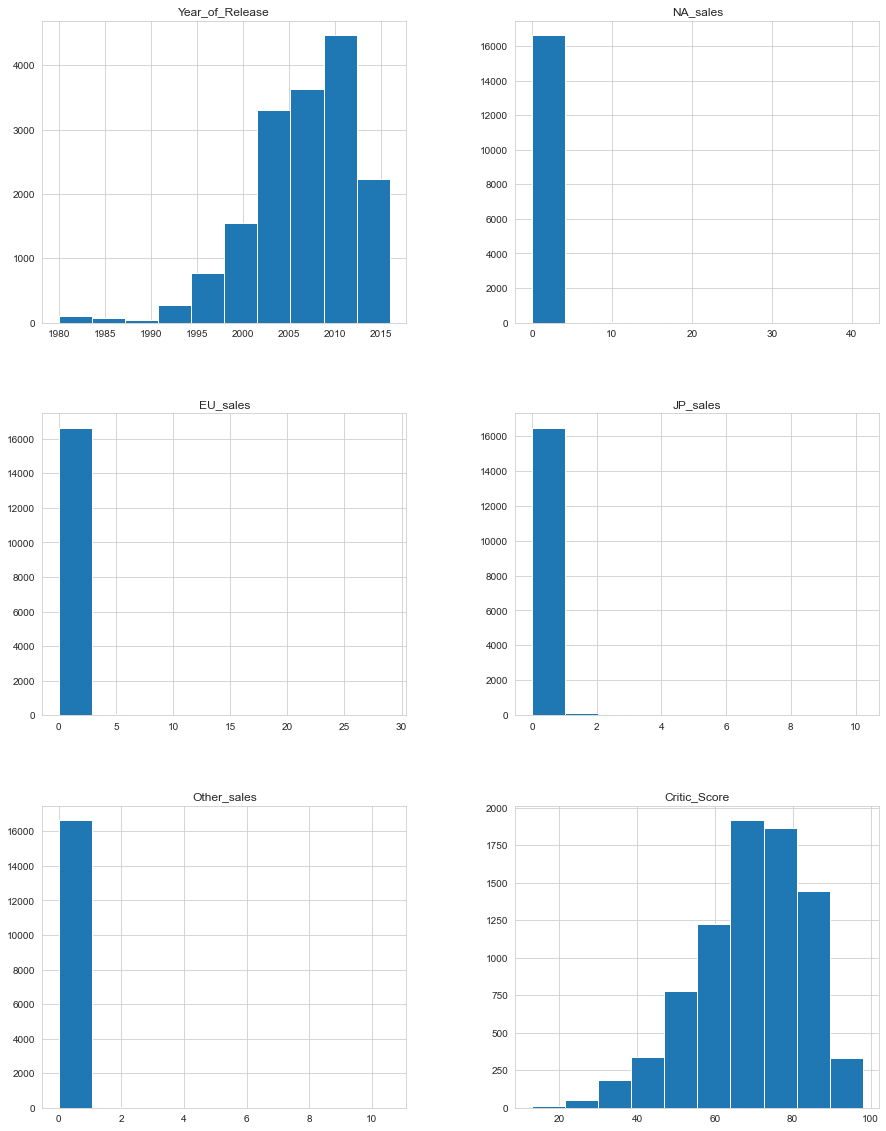

In [125]:
df.hist(figsize=(15, 20))
plt.show()

Данные считались из csv корректно, в таблице 11 столбцов и 16715 строк. Имеются пропуски: самое большое количество в столбцах Critic Score, User_Score, Rating. В столбце User_Score необходимо будет изменить тип данных на числовой.

<a id='section2'></a>
### 2 Предобработка данных



переименуем столбцы (приведем к нижнему регистру)

In [126]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Большое количество пропусков  в столбцах 8, 9, 10.

* Типы данных в столбцах в порядке за исключением столбца 9 - user_score. Требуется заменить на числовой.

* Столбец year_of_release лучше заменить на целочисленный. Для этого придется избавиться от NaN (пропусков мало а значит мы не рискуем потерять данные)


Изучим записи с пропущенными данными по оценке критиков

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8578 entries, 1 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8576 non-null   object 
 1   platform         8578 non-null   object 
 2   year_of_release  8463 non-null   float64
 3   genre            8576 non-null   object 
 4   na_sales         8578 non-null   float64
 5   eu_sales         8578 non-null   float64
 6   jp_sales         8578 non-null   float64
 7   other_sales      8578 non-null   float64
 8   critic_score     0 non-null      float64
 9   user_score       1915 non-null   object 
 10  rating           1895 non-null   object 
dtypes: float64(6), object(5)
memory usage: 804.2+ KB


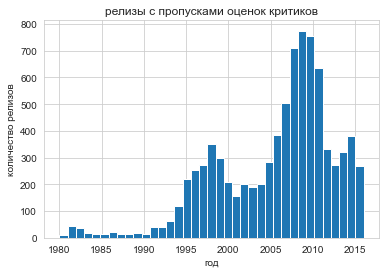

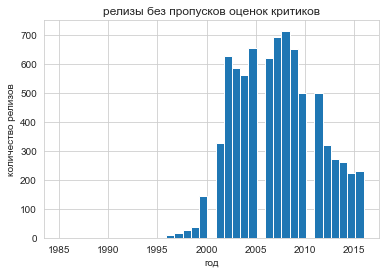

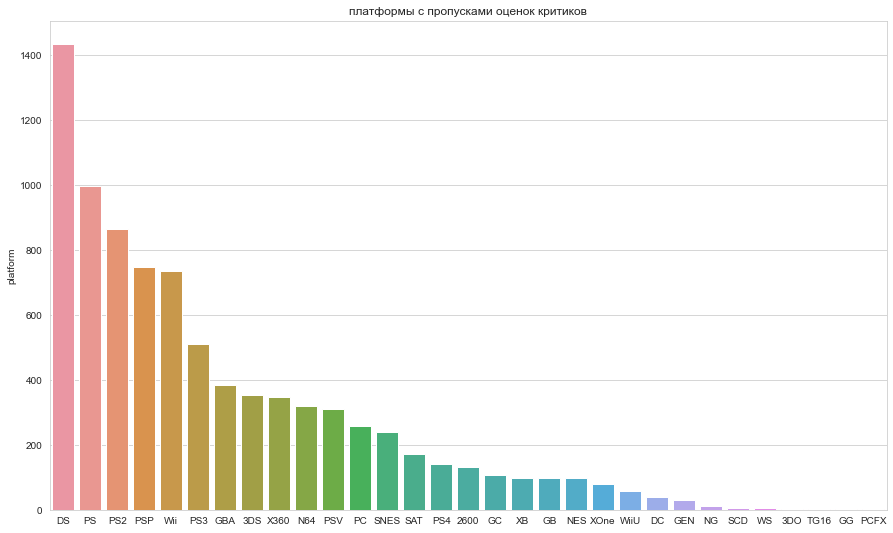

<AxesSubplot:title={'center':'платформы без пропусков оценок критиков'}, ylabel='platform'>

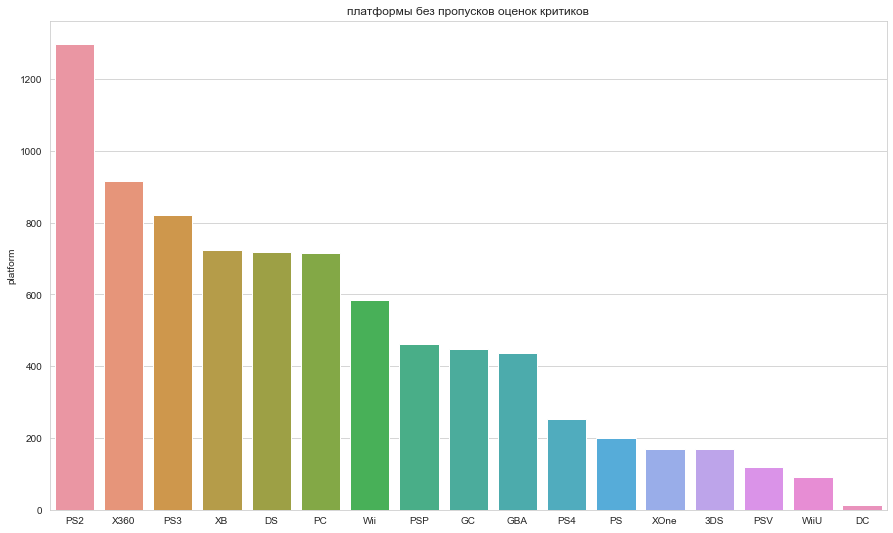

In [128]:
crit_na = df.query('critic_score.isna()')
crit_filled = df.dropna(subset=['critic_score'])
#изучим таблицу с пропущенными значениями
crit_na.info()
#проверим привязаны ли пропуски к какому то периоду времени
plt.show()
crit_na['year_of_release'].hist(bins=37)
plt.title('релизы с пропусками оценок критиков')
plt.xlabel('год')
plt.ylabel('количество релизов')
plt.show()
plt.title('релизы без пропусков оценок критиков')
crit_filled['year_of_release'].hist(bins=37)
plt.xlabel('год')
plt.ylabel('количество релизов')
#посмотрим привязаны ли пропуски к каким-то конкретным платформам
plt.figure(figsize=(15,9))
#платформы данных с пропусками
plt.title('платформы с пропусками оценок критиков')
sns.barplot(x=crit_na['platform'].value_counts().index, y=crit_na['platform'].value_counts())
plt.show()
#платформы данных без пропусков
plt.figure(figsize=(15,9))
plt.title('платформы без пропусков оценок критиков')
sns.barplot(x=crit_filled['platform'].value_counts().index, y=crit_filled['platform'].value_counts())


Пропуски не зависят от временного периода. Пропуски critic_score как правило соседствуют с пропусками user_score и rating.
Большое количество пропусков для платформ DS, PS, PS2, PSP, Wii, PS3. Впрочем многие из этих платформ есть в топе по количеству релизов для данных без пропусков

Возможно какие-то релизы оценивались критиками только для какой-то одной платформы и не получили оценку для другой либо к ним не было интереса критиков.

Большинство платформ с пропусками (топ-6) уже неактуальны на настоящий период

Попробуем заполнить пропуски следующим образом: посмотрим есть ли такой же релиз на другой платформу и если есть запишем ее в пропуск. Но сначала изменим формат данных в столбца year_of_release и user_score


In [129]:
df=df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release'] = df['year_of_release'].astype('int')

In [130]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [131]:
df.loc[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
710,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16426,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16428,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16429,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16435,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E



tbd - to be defined. То есть в настоящий момент данные отсутствует заменим tbd на NaN. Чтобы tbd не мешало нам поменять тип данных на числовой

In [132]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

изменим тип данных в столбце 'user_score' на числовой

In [133]:
df['user_score'] = pd.to_numeric(df['user_score'])

In [134]:
df.loc[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


странные две игры без названия. Впрочем это 93 год, для нашего исследования не принципиально

Попробуем заполнить пропуски следующим образом: посмотрим есть ли такой же релиз на другой платформу и если есть запишем данные для этого релиза в пропуск.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [136]:
def critic_score_missing_fill(row):
    if np.isnan(row['critic_score']):
        n = row['name']
        return df.query('name == @n')['critic_score'].median()
    else:
        return row['critic_score']



In [137]:
def user_score_missing_fill(row):
    if np.isnan(row['user_score']):
        n = row['name']
        return df.query('name == @n')['user_score'].median()
    else:
        return row['user_score']


In [138]:
df['critic_score'] = df.apply(critic_score_missing_fill, axis=1)

In [139]:
df['user_score'] = df.apply(user_score_missing_fill, axis=1)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     8922 non-null   float64
 9   user_score       8524 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Часть пропусков заполнили ~1000, но не большую часть

Изучим пропуски в столбце 'rating'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6678 entries, 1 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6676 non-null   object 
 1   platform         6678 non-null   object 
 2   year_of_release  6678 non-null   int64  
 3   genre            6676 non-null   object 
 4   na_sales         6678 non-null   float64
 5   eu_sales         6678 non-null   float64
 6   jp_sales         6678 non-null   float64
 7   other_sales      6678 non-null   float64
 8   critic_score     418 non-null    float64
 9   user_score       408 non-null    float64
 10  rating           0 non-null      object 
dtypes: float64(6), int64(1), object(4)
memory usage: 626.1+ KB


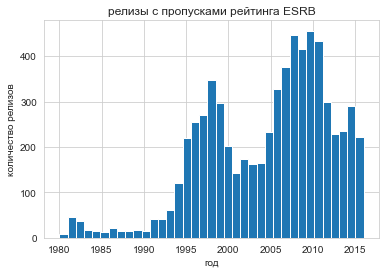

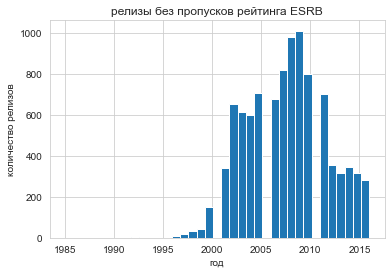

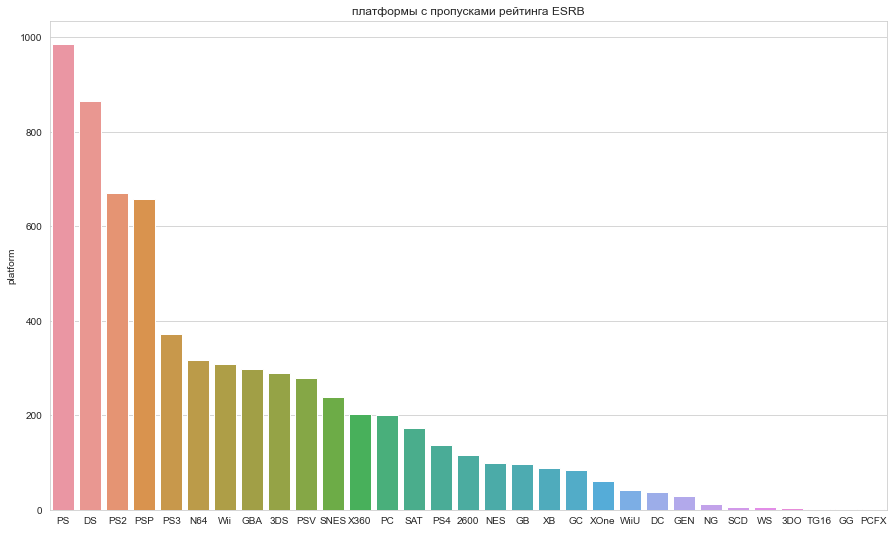

<AxesSubplot:title={'center':'платформы без пропусков рейтинга  ESRB'}, ylabel='platform'>

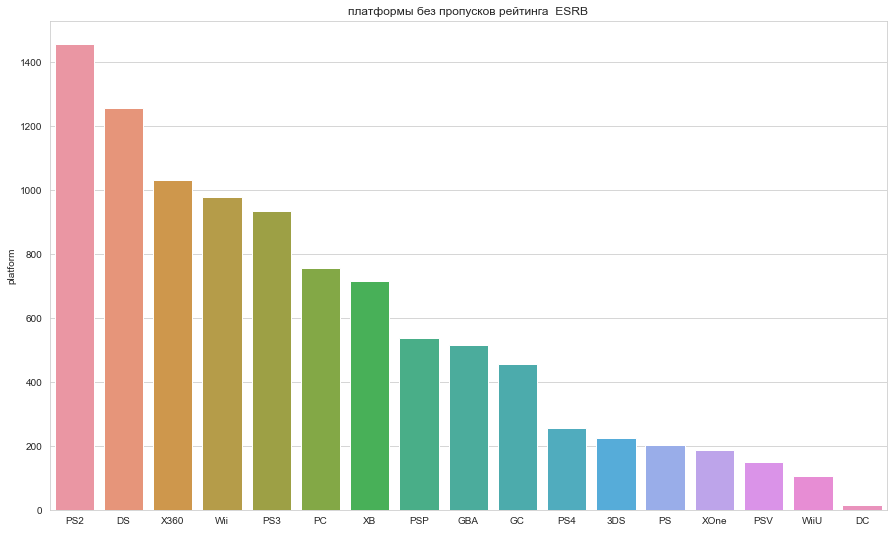

In [141]:
rating_na = df.query('rating.isna()')   #запишем отдельно данные с пропусками рейтинга
rating_filled = df.dropna(subset=['rating']) #запишем отдельно данные без пропуска рейтинга
#изучим таблицу с пропущенными значениями
rating_na.info()
#проверим привязаны ли пропуски к какому то периоду времени
plt.show()
rating_na['year_of_release'].hist(bins=37)
plt.title('релизы с пропусками рейтинга ESRB')
plt.xlabel('год')
plt.ylabel('количество релизов')
plt.show()
plt.title('релизы без пропусков рейтинга ESRB')
rating_filled['year_of_release'].hist(bins=37)
plt.xlabel('год')
plt.ylabel('количество релизов')
#посмотрим привязаны ли пропуски к каким-то конкретным платформам
plt.figure(figsize=(15,9))
#платформы данных с пропусками
plt.title('платформы с пропусками рейтинга ESRB')
sns.barplot(x=rating_na['platform'].value_counts().index, y=rating_na['platform'].value_counts())
plt.show()
#платформы данных без пропусков
plt.figure(figsize=(15,9))
plt.title('платформы без пропусков рейтинга  ESRB')
sns.barplot(x=rating_filled['platform'].value_counts().index, y=rating_filled['platform'].value_counts())

Определенной связи наличия рейтинга с временем выхода релиза и платформой не прослеживается, либо она не очевидна. В целом рейтинг ESRB нацелен на американский рынок, у японского рынка своя система возрастного рейтинг - CERO, а у европейского рынка рейтинг - PEGO. Возможно, издатели релизов были нацелены на определенный рынок и не были озабочены получением рейтинга ESRB.
Попробуем заполнить пропуски по аналогии с предыдущим (если рейтинг получил релиз для какой-то другой платформы подставим этот рейтинг к тому же релизу на другой платформе

In [166]:
rating_filled = rating_filled.drop_duplicates(subset="name")

In [167]:
rating_filled

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16427,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T
16428,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.00,53.0,NaN,E
16429,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,NaN,E
16433,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+


In [201]:
rating_filled.loc[rating_filled['name'] == 'Wii Fit','rating'].max()

'E'

In [202]:
def fill_missed_rating(row):
    if pd.isna(row['rating']):
        n = row['name']
        if not rating_filled.loc[rating_filled['name'] == n,'rating'].empty:
            filled_rating = rating_filled.loc[rating_filled['name'] == n,'rating'].max()

        else:
            filled_rating = 'unknown'

        return filled_rating

    return row['rating']

In [203]:
df['rating'] = df.apply(fill_missed_rating, axis=1)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     8922 non-null   float64
 9   user_score       8524 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [212]:
df['rating'].count() - df[df['rating']=='unknown']['rating'].count()

10185

Мы нашли рейтинг для ~400 релизов. Для остальных поставили пометку unknown

Создадим столбец с суммарным количеством проданных копий

In [213]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

Проверим дубликаты

In [214]:

dup = df.duplicated(subset=['name','platform'], keep=False)
dup = dup.loc[dup == True].index
df.loc[dup]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown,2.39
1178,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1575,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5884,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11535,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
15971,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


Need for Speed: Most Wanted не дубликат судя по году релиза это разные игры что и подтвердил гугл.
Madden NFL13 следующий дубликат. Удалим ту запись где меньше продаж.
Игры с NaN в имени просто удалим

In [215]:
df = df.drop(index=[14022,652,15971]) #удалим дубликаты

# переименуем NFS most wanted
df.loc[1178,'name'] = 'Need for Speed: Most Wanted 2012'
df.loc[1575,'name'] = 'Need for Speed: Most Wanted 2005'
df.loc[5884,'name'] = 'Need for Speed: Most Wanted 2005'
df.loc[11535,'name'] = 'Need for Speed: Most Wanted 2012'

df = df.reset_index(drop=True)


In [216]:
df.duplicated(subset=['name','platform']).sum()


0

Дубликатов больше нет

<a id='section3'></a>
### 3 Исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [217]:
df['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Text(0, 0.5, 'количество релизов')

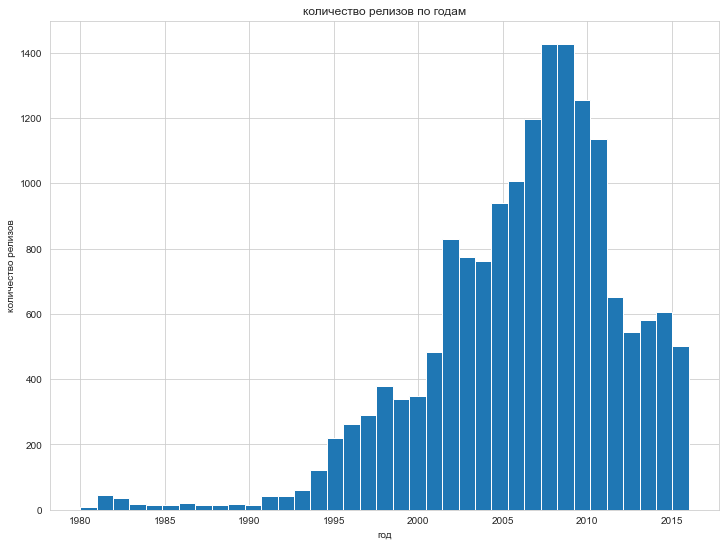

In [218]:
df['year_of_release'].hist(bins=37, figsize=(12,9))
plt.title('количество релизов по годам')
plt.xlabel('год')
plt.ylabel('количество релизов')

Количество выпущенных релизов росло достаточно бурно до 2009, 2009-2013,начиная с 2013 опять начинается небольшой рост. (2016 год еще не полный поэтому спад 2015 vs 2016 на графике скорее всего вызван неполнотой данных за 2016 год)

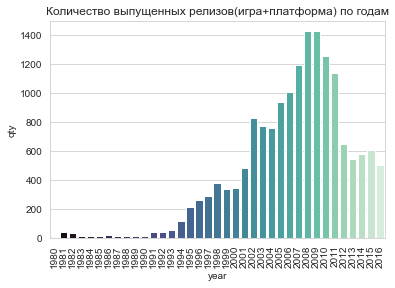

<Figure size 1080x576 with 0 Axes>

In [219]:
year = pd.DataFrame(df.groupby('year_of_release')['year_of_release'].count())
year = year.rename(columns={'year_of_release':'qty'})
year['year'] = year.index
sns.barplot(x='year',y='qty',data=year, palette='mako')
plt.title('Количество выпущенных релизов(игра+платформа) по годам')
plt.xticks(rotation='vertical')
plt.figure(figsize=(15,8))
plt.show()

In [220]:
df_games_titles = df.drop_duplicates(subset='name')  #уберем дубликаты по имени и положим в новый df
df_games_titles.shape

(11428, 12)

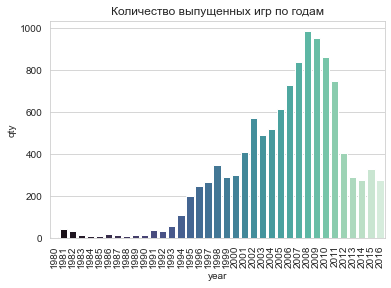

<Figure size 1080x576 with 0 Axes>

In [221]:
year = pd.DataFrame(df_games_titles.groupby('year_of_release')['year_of_release'].count())
year = year.rename(columns={'year_of_release':'qty'})
year['year'] = year.index
sns.barplot(x='year',y='qty',data=year, palette='mako')
plt.title('Количество выпущенных игр по годам')
plt.xticks(rotation='vertical')
plt.figure(figsize=(15,8))
plt.show()

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [222]:
platforms = df.groupby('platform')['total_sales'].sum().sort_values()

display(platforms)

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.33
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64

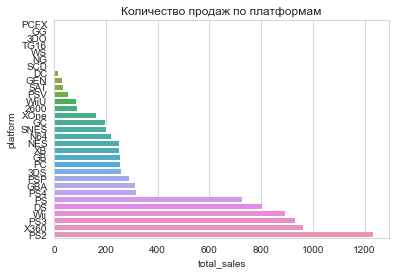

In [223]:
sns.barplot(y=platforms.index,x=platforms)
plt.title('Количество продаж по платформам')
plt.show()

In [224]:
platforms_list = platforms.index
platforms_list

Index(['PCFX', 'GG', '3DO', 'TG16', 'WS', 'NG', 'SCD', 'DC', 'GEN', 'SAT',
       'PSV', 'WiiU', '2600', 'XOne', 'GC', 'SNES', 'N64', 'NES', 'XB', 'GB',
       'PC', '3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360',
       'PS2'],
      dtype='object', name='platform')

In [225]:
top_platforms = platforms_list[-11::]   #выберем топ-11 платформ за все время

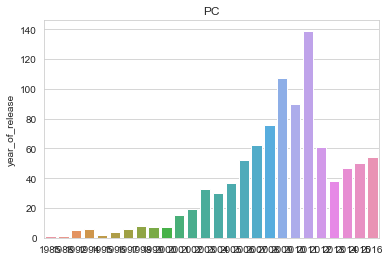

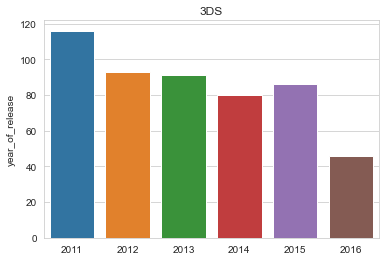

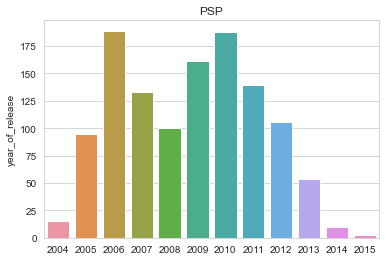

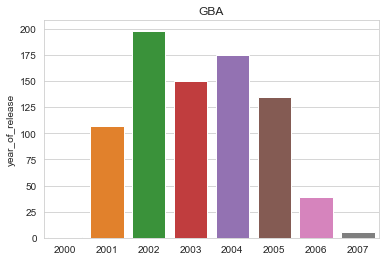

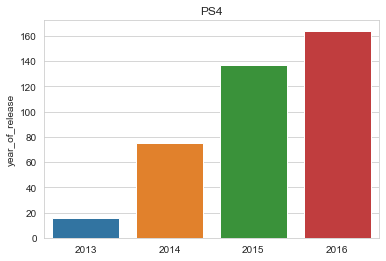

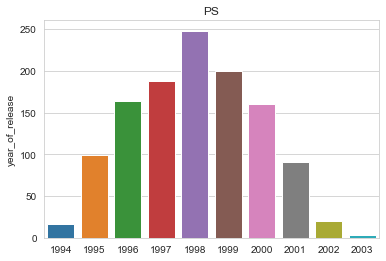

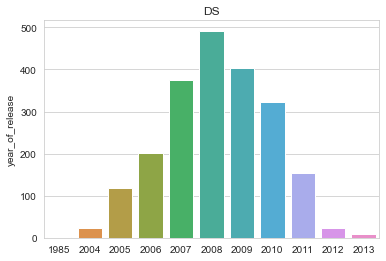

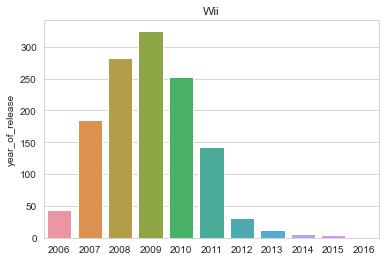

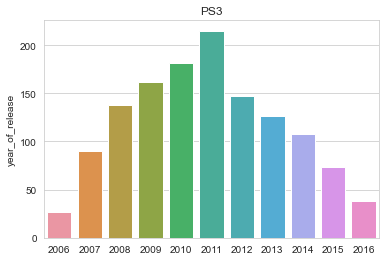

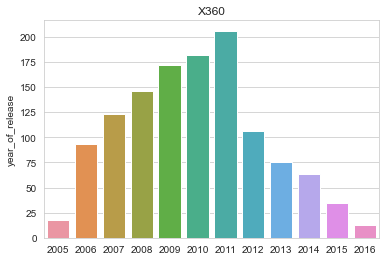

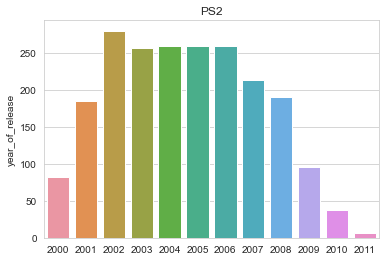

Среднее время жизни платформы (период в который выходят новые релизы)  9.7 лет


In [226]:
life=0
for item in top_platforms:
    life_cycle = df.loc[df['platform'] == item,'year_of_release'].value_counts()
    sns.barplot(x=life_cycle.index, y=life_cycle)
    if item != 'PC':     #исключим PC так как эта платформа имеет перманентное развитие
        life += len(life_cycle)     #просуммируем время жизни каждой из платформ
    plt.title(item)
    plt.show()

print('Среднее время жизни платформы (период в который выходят новые релизы) ', "%.1f" % (life/(len(top_platforms)-1)), 'лет')

Также очевидно, что интервал между появлением новых платформ составляет немного меньший срок (чем срок жизни платформы). Так как с появлением новой платформы, для старой еще выходят новые релизы в течение нескольких лет.

Практически все представленные платформы из ТОП-11 по продажам релизов за все время, находятся в процессе завершения жизненного цикла (сильный тренд на спад количества релизов) либо уже закончили его, за исключением двух - PC и PS4.

За актуальный период возьмем 4 последних года. 2013-2016. 2013 момент появления растущей по продажам PS4.
и примерно половина полного жизненного цикла платформы. Также данный период не захватывает большой объем данных периода "бума" выхода новых релизов в 2006-2011 годах для уже неактуальных платформ.



In [227]:
df = df.query('year_of_release >= 2013')


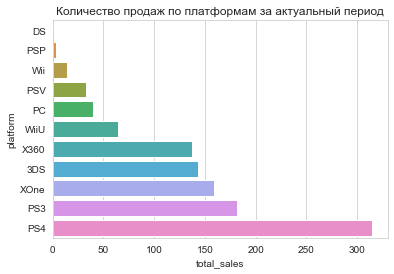

In [228]:
platforms = df.groupby('platform')['total_sales'].sum().sort_values()
sns.barplot(y=platforms.index,x=platforms)
plt.title('Количество продаж по платформам за актуальный период')
plt.show()

Топ-5 платформ по продажам за период 2013-2016 -  <b>PS4, PS3, XOne, 3DS, X360<b>

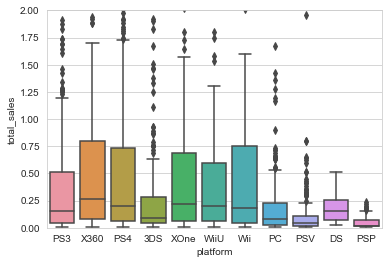

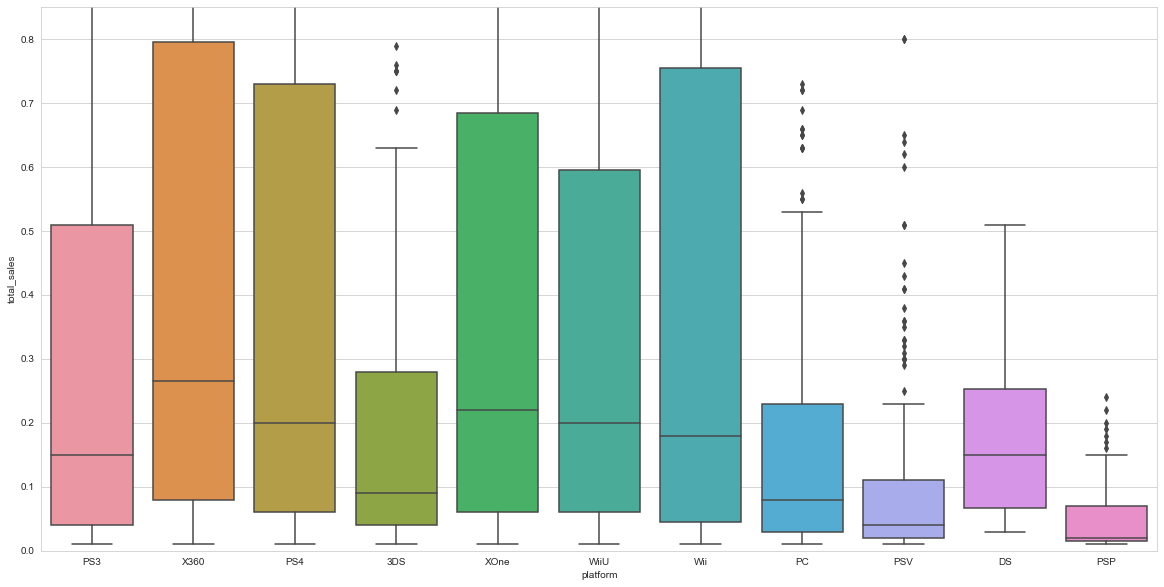

In [229]:
sns.boxplot(data=df, x='platform', y='total_sales')
plt.ylim(0,2)
plt.show()
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x='platform', y='total_sales')
plt.ylim(0,0.85)
plt.show()

Наибольшие медианные значения продаж релизов у платформ X360, Xone, PS4, WiiU, Wii, равно как и наибольший Q3.
Следом идет PS3

Посмотрим продажи платформ (их релизов) по годам за актуальный период чтобы посмотреть динамику

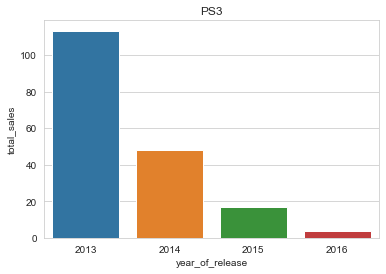

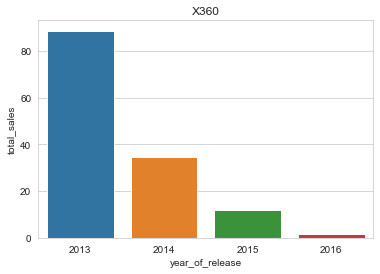

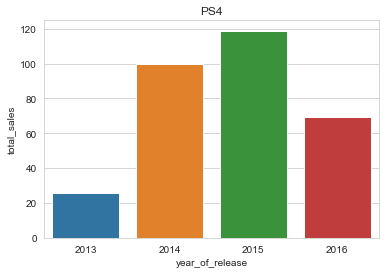

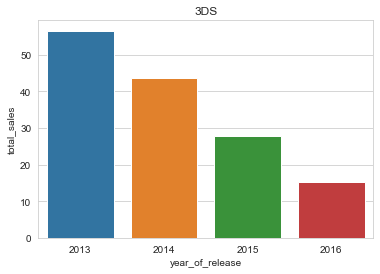

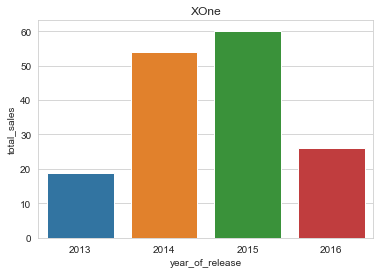

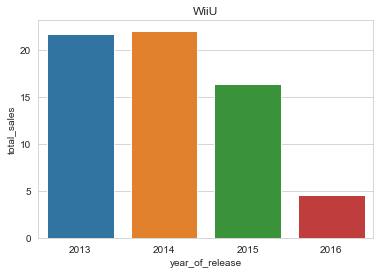

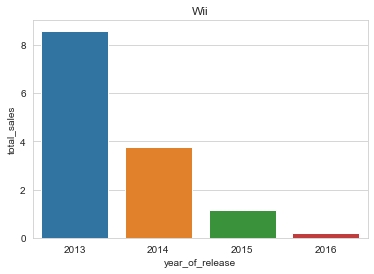

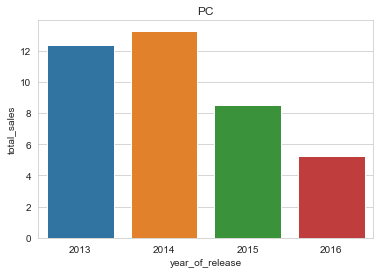

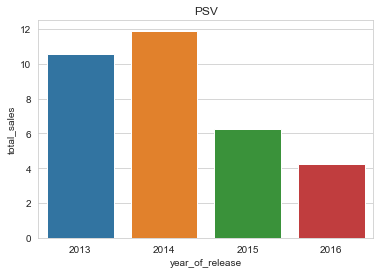

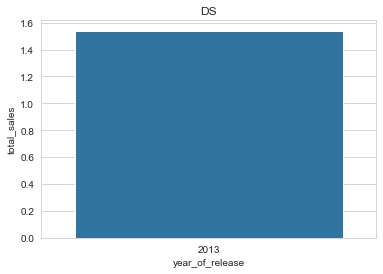

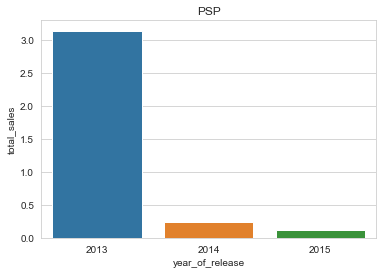

In [230]:
for item in df['platform'].unique():       #переберем платформы из уникальных значений колонки 'platform'

    #запишем в life_cycle сводную таблицу по конкретной платформе с распределением продаж по годам

    life_cycle = df.query('platform == @item') \
        .pivot_table(index='year_of_release',
                    values='total_sales',
                    aggfunc='sum')

    # построим график для life_cycle

    sns.barplot(x=life_cycle.index, y='total_sales', data=life_cycle)
    plt.title(item)
    plt.show()

<AxesSubplot:xlabel='year_of_release'>

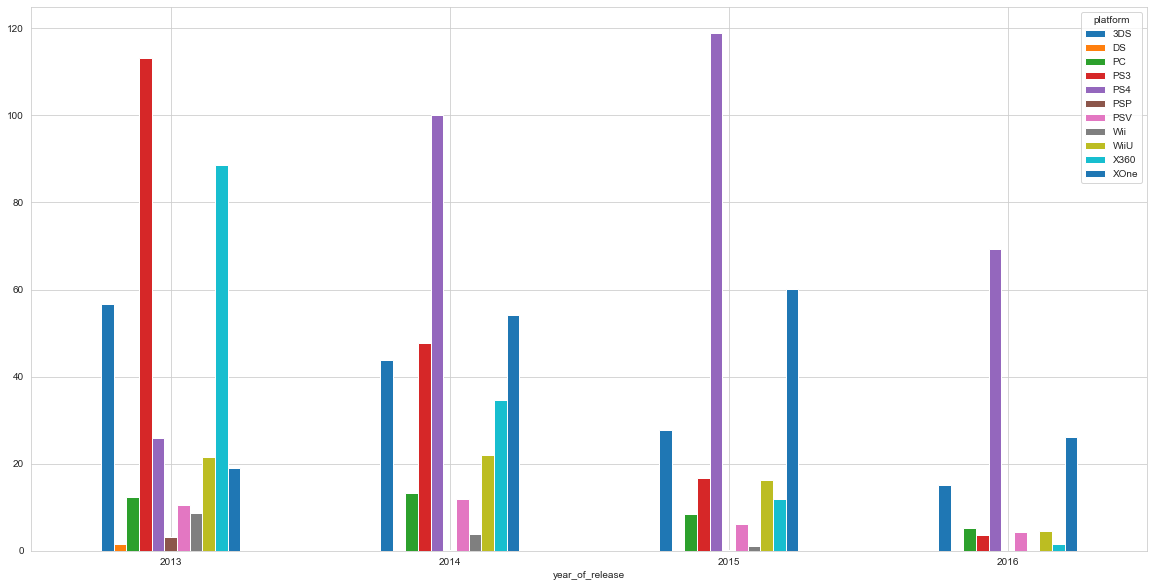

In [231]:
act_platf_sales = df.pivot_table(index='year_of_release',
                                 columns='platform',
                                 values='total_sales',
                                 aggfunc={'total_sales':'sum'})
act_platf_sales.plot.bar(rot=0, grid=True, figsize=(20, 10))



Топ-5 платформ по продажам за выбранный актуальный период это - PS3,PS4,X360,Xone, 3DS. Однако на последних графиках очевидно что продажи PS3 падают и платформа завершает свой жизненный цикл, в той же ситуации находится X360. Топ-платформы с позитивным трендом на рост продаж это PS4 и Xone. Остальные платформы находятся в негативном тренде сильного спада продаж. 3DS все еще имеет неплохой уровень продаж однако тренд в течение последних 4 лет негативный.

<b>Соответственно, потенциально прибыльные платформы - PS4 и Xone<b>

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Выберем платформу - PS4. Она самая популярная на настоящий момент и по ней много данных

<AxesSubplot:xlabel='user_score'>

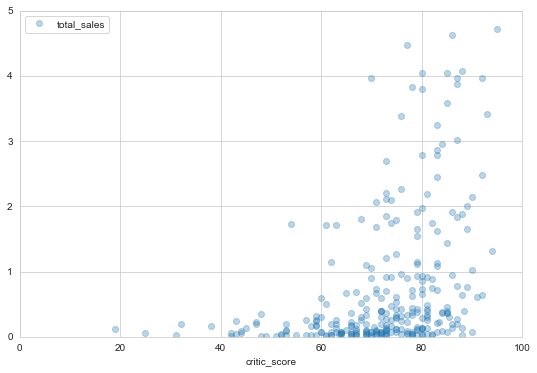

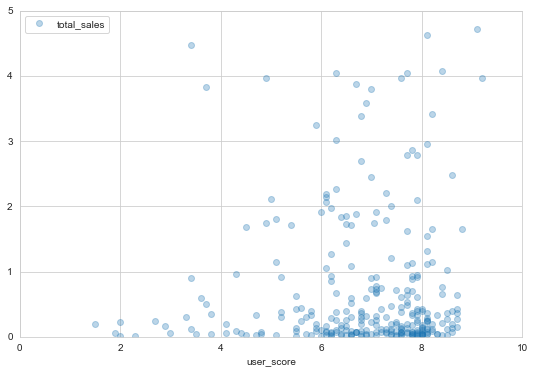

In [232]:
ps4=df.query('platform == "PS4"')
ps4.plot(y='total_sales',
        x='critic_score',
        style='o',
        figsize=(9,6),
        ylim=(0,5
              ),
        xlim=(0,100),
        alpha=0.3)
ps4.plot(y='total_sales',
         x='user_score',
         style='o',
         figsize=(9,6),
         ylim=(0,5
               ),
         xlim=(0,10),
         alpha=0.3)

In [233]:
print('Корреляция между продажами и оценкой критиков:',ps4['total_sales'].corr(ps4['critic_score']))
print('Корреляция между продажами и оценкой пользователей:', ps4['total_sales'].corr(ps4['user_score']))

Корреляция между продажами и оценкой критиков: 0.3906015973113039
Корреляция между продажами и оценкой пользователей: -0.02218030886581896


Корреляция между оценкой критиков и продажами есть хоть и несильная из-за достаточно высокого разброса (есть релизы с высокой оценкой но низкими продажами).
Корреляция между оценкой игроков и продажами отсутствует.

Однако стоит заметить что топ-релизы с экстремально высоким уровнем продаж имеют высокую оценку критиков - так например у релизов с продажами выше 2 млн копий не бывает оценки ниже 70.

Впрочем продажи выше 2 млн это попадает в диапазон выбросов. Посмотрим диаграмму рассеяния для нормального уровня продаж

<AxesSubplot:title={'center':'Продажи vs Оценка игроков'}, xlabel='user_score'>

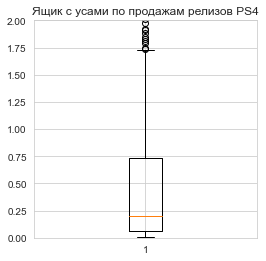

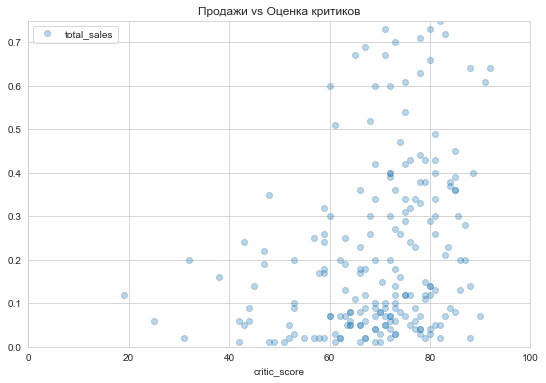

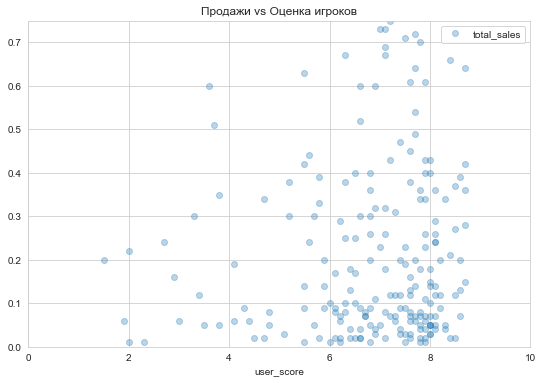

In [234]:
plt.figure(figsize=(4,4))
plt.title('Ящик с усами по продажам релизов PS4')
plt.boxplot(ps4['total_sales'])
plt.ylim(0,2)


ps4.plot(y='total_sales',
         x='critic_score',
         style='o',
         figsize=(9,6),
         ylim=(0,0.75),
         xlim=(0,100),
         alpha=0.3, title='Продажи vs Оценка критиков')


ps4.plot(y='total_sales',
         x='user_score',
         style='o',
         figsize=(9,6),
         ylim=(0,0.75),
         xlim=(0,10),
         alpha=0.3, title='Продажи vs Оценка игроков')


В целом также большой разброс имеется, но можно утверждать что высокая оценка критиков не гарантирует высоких продаж (так же как и оценка игроков). НО игры с самыми высокими продажами всегда имеют оценку критиков >60-70

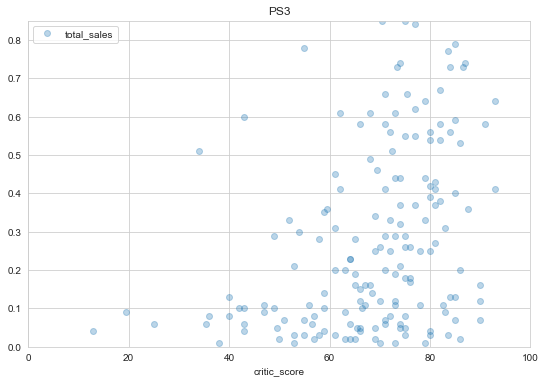

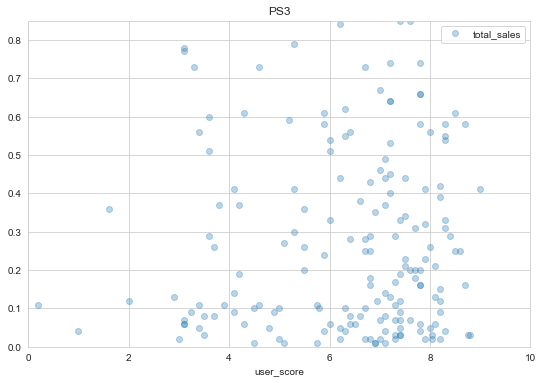

PS3 :Корреляция между продажами и оценкой критиков: 0.29150451978687014
PS3 :Корреляция между продажами и оценкой пользователей: 0.00839106028457822


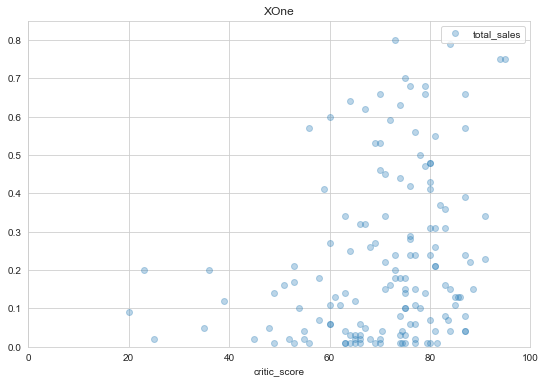

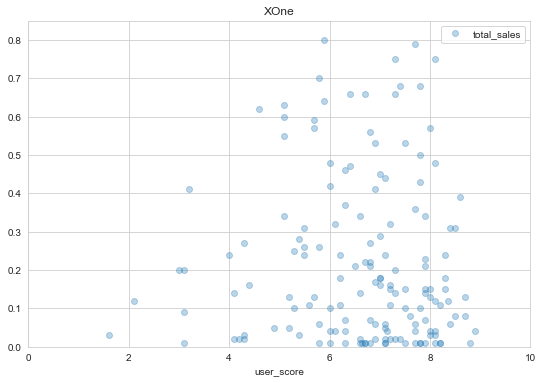

XOne :Корреляция между продажами и оценкой критиков: 0.3755776004203437
XOne :Корреляция между продажами и оценкой пользователей: -0.09647892333700665


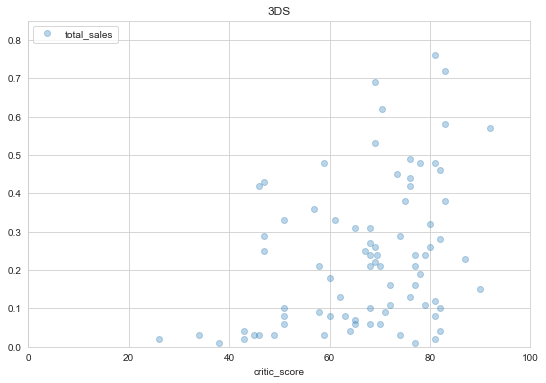

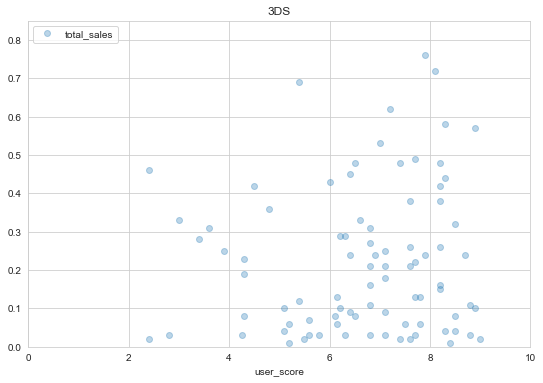

3DS :Корреляция между продажами и оценкой критиков: 0.34229673952184747
3DS :Корреляция между продажами и оценкой пользователей: 0.2860254423337859


In [235]:
for p in ['PS3', 'XOne', '3DS']:
    platf = df.query('platform == @p')
    platf.plot(y='total_sales',
        x='critic_score',
        style='o',
        figsize=(9,6),
        ylim=(0,0.85),
        xlim=(0,100),
        alpha=0.3,
        title=p)
    platf.plot(y='total_sales',
         x='user_score',
         style='o',
         figsize=(9,6),
         ylim=(0,0.85),
         xlim=(0,10),
         alpha=0.3,
         title=p)
    plt.show()


    print(p, ':Корреляция между продажами и оценкой критиков:',
          platf['total_sales'].corr(platf['critic_score']))

    print(p, ':Корреляция между продажами и оценкой пользователей:',
          platf['total_sales'].corr(platf['user_score']))

Результаты анализа корреляции оценок пользователей и критиков с уровнем продаж по платформам XOne и PS3 похожи на PS4 - присутствует положительная корреляция уровня продаж и оценки критиков, а корреляция между продажами и оценками пользователей очень слабая.
А вот для мобильной платформы 3DS присутствует положительная корреляция также между оценками пользователей и уровнем продаж.

В целом из всех графиков видно что для высокой оценки критиков и пользователей уровень продаж может быть любой. Однако как правило большинство релизов с высоким уровнем продаж имеют оценку выше среднего. Можно сказать что высокая оценка критиков и пользователей не гарантия высоких продаж, но одно из условий :)

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посмотрим распределение жанров по суммарным продажам

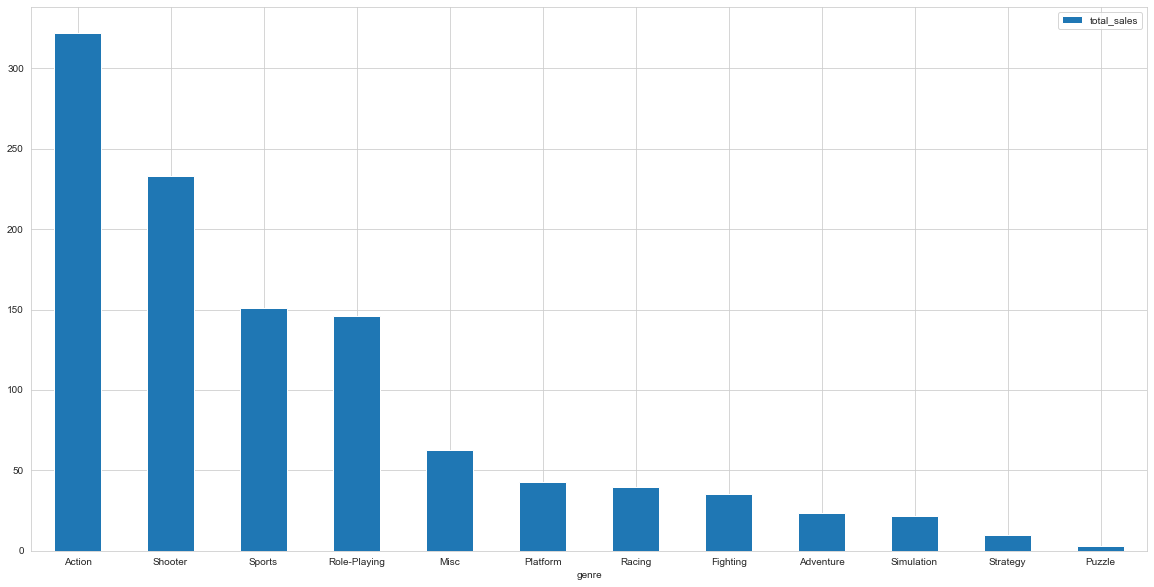

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [236]:
genre_sales = df.pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_sales.plot.bar(rot=0, grid=True, figsize=(20, 10))
plt.show()
display(genre_sales)

Посмотрим распределение жанров по медианному уровню продаж. Что более подходит для целей исследования - выбрать наиболее прибыльный жанр

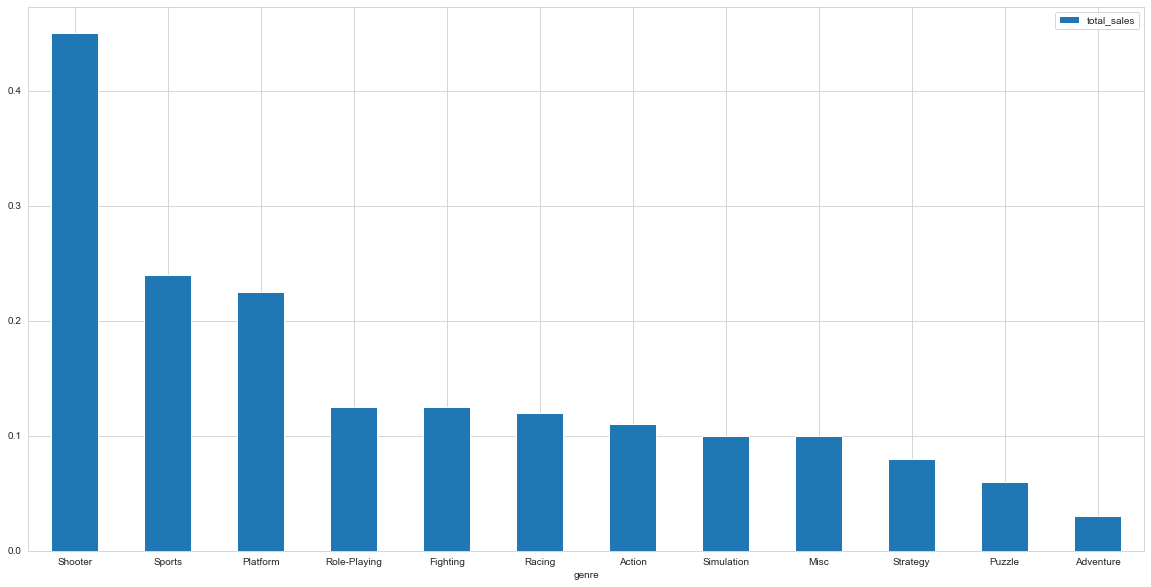

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


In [237]:
genre_sales = df.pivot_table(index='genre',values='total_sales',aggfunc='median').sort_values(by='total_sales', ascending=False)
genre_sales.plot.bar(rot=0, grid=True, figsize=(20, 10))
plt.show()
display(genre_sales)

Топ жанры по медианному уровню продаж <b>AShooter, Sports, Platform, Role-Playing.

Анти-топ: <b>Puzzle, Strategy, Adventure<b>.

Посмотрим также количество релизов в разрезе жанров

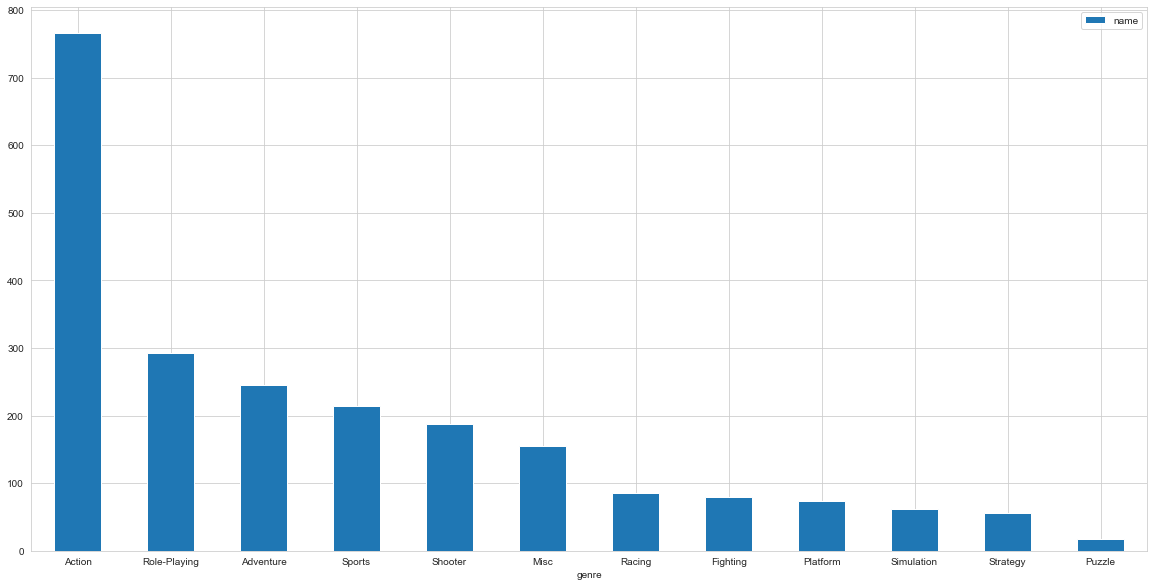

,name
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


In [238]:
genre_sales = df.pivot_table(index='genre',values='name',aggfunc='count').sort_values(by='name', ascending=False)
genre_sales.plot.bar(rot=0, grid=True, figsize=(20, 10))
plt.show()
display(genre_sales)

Небольшое изменение в топе лидеров жанр Adventure довольно низкий по продажам оказался в топ-3 по количеству выпущенных релизов. В остальном спрос соответствует предложению :)

<a id='section4'></a>
### 4 Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [239]:
regions=['na_sales','eu_sales','jp_sales']

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

437.71

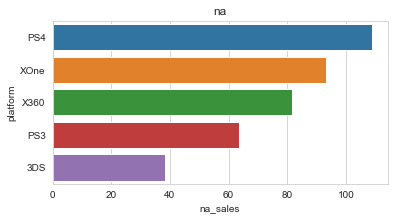

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

392.23

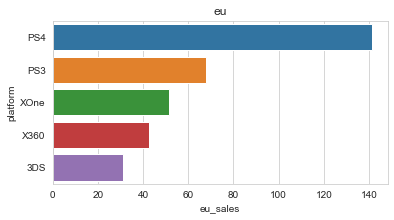

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

140.78

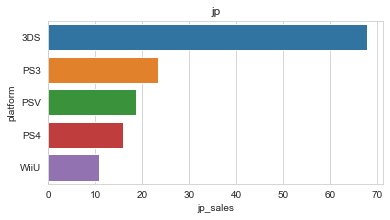

In [240]:
for region in regions:
    region_top = df.groupby('platform')[region].sum().sort_values(ascending=False) #группируем по платформам и считаем продажи в регионе, сортируем по убыванию
    region_top_5 = region_top[0:5]
    display(region_top_5)   #покажем список топ-5
    display(region_top.sum())   #покажем сумму всех продаж
    plt.figure(figsize=(6,3))
    sns.barplot(y=region_top_5.index,x=region_top_5)
    plt.title(region[0:2])
    plt.show()


PS3, PS4, 3DS - три платформы, которые попали в топ-5 продаж во всех трех регионах.

<b> NA </b> : Лидирует современная PS4, c плавным убыванием продаж следом идут платформы XBox, PS3, и завершает рейтинг мобильная 3DS от Nintendo

<b> EU </b>: Рынок похож на американский, однако лидерство PS4 по продажам очевидно - >36% релизов за актуальный период продано для этой платформы

<b> JP </b>: Другой мир. Безоговорочный лидер 3DS для которой продано 48% всех релизов за актуальный период. Также среди топ-5 мобильная платформа PSV и WiiU (которых нет среди топов EU и NA), А лидер американского и европейского рынков PS4 только на 4 месте с долей ~12%

Посмотрим распределение по суммарным продажам в разрезе жанров

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

437.7099999999999

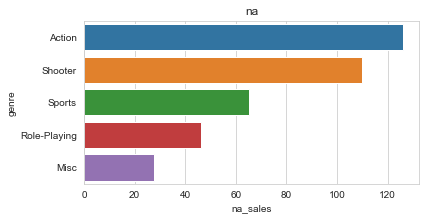

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

392.2300000000001

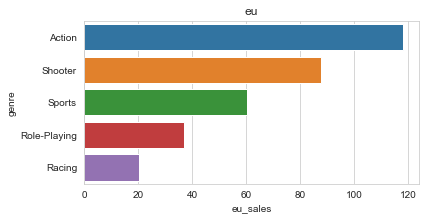

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

140.78000000000003

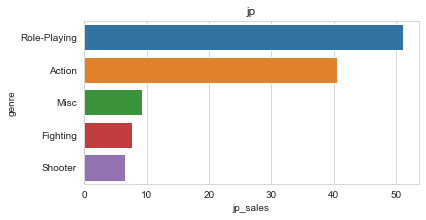

In [241]:
for region in regions:
    region_top = df.groupby('genre')[region].sum().sort_values(ascending=False) #группируем по жанрам и считаем продажи в регионе, сортируем по убыванию
    region_top_5 = region_top[0:5]  #смотрим топ-5
    display(region_top_5)
    display(region_top.sum())   #покажем сумму всех продаж
    plt.figure(figsize=(6,3))
    sns.barplot(y=region_top_5.index,x=region_top_5)
    plt.title(region[0:2])
    plt.show()

Рынки Америки и Европы схожи в разрезе популярных жанров: тут одинаковые ТОП-4 Action, Shooter, Sports, Role-Playing. Причем доли также cхожи (в NA немного больше популярны шутеры)

JP: Почти 65% продаж это два жанра Role-playing и Action. Также среди топ появился Fighting который отсутствовал в лидерах на рынках EU и NA.


Посмотрим распределение по медианному уровню продаж в разрезе жанров по регионам

genre
Shooter     0.200
Platform    0.090
Sports      0.080
Fighting    0.045
Racing      0.030
Name: na_sales, dtype: float64

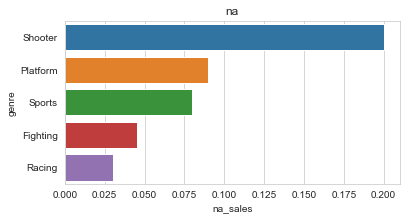

genre
Shooter       0.190
Platform      0.080
Racing        0.060
Sports        0.050
Simulation    0.035
Name: eu_sales, dtype: float64

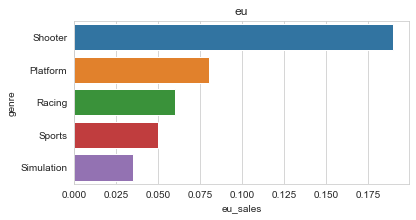

genre
Role-Playing    0.05
Fighting        0.03
Misc            0.02
Puzzle          0.02
Action          0.01
Name: jp_sales, dtype: float64

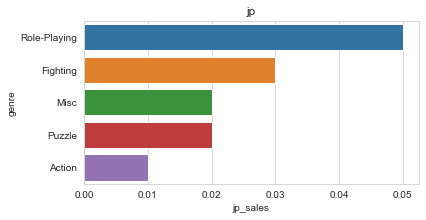

In [242]:
for region in regions:
    region_top = df.groupby('genre')[region].median().sort_values(
        ascending=False)  #группируем по жанрам и считаем продажи в регионе, сортируем по убыванию
    region_top_5 = region_top[0:5]  #смотрим топ-5
    display(region_top_5)

    plt.figure(figsize=(6, 3))
    sns.barplot(y=region_top_5.index, x=region_top_5)
    plt.title(region[0:2])
    plt.show()

Получается, что в EU и NA наиболее прибыльными (приносящими стабильный доход так как имеют наибольшую медиану уровня продаж) жанры 1) Shooter, 2) Platform, 3) Sports(na)/Racing(eu)
На японском рынке стабильно прибыльными явлются жанры 1) Role-Playing и 2) Fighting

rating
M          172.82
E           81.71
unknown     74.82
E10+        56.38
T           51.98
Name: na_sales, dtype: float64

437.71

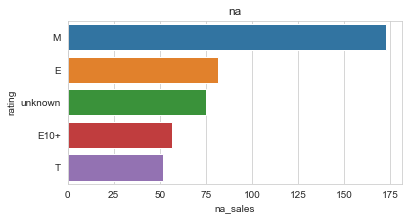

rating
M          153.71
E           85.49
unknown     64.15
E10+        45.20
T           43.68
Name: eu_sales, dtype: float64

392.23

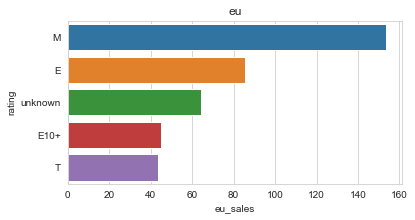

rating
unknown    80.97
T          22.84
E          15.98
M          14.72
E10+        6.27
Name: jp_sales, dtype: float64

140.78000000000003

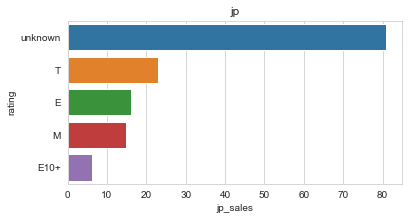

In [243]:
for region in regions:
    region_top = df.groupby('rating')[region].sum().sort_values(ascending=False) #группируем по рейтингу и считаем продажи в регионе, сортируем по убыванию
    region_top_5 = region_top[0:5]  #смотрим топ-5
    display(region_top_5)
    display(region_top.sum())   #покажем сумму всех продаж
    plt.figure(figsize=(6,3))
    sns.barplot(y=region_top_5.index,x=region_top_5)
    plt.title(region[0:2])
    plt.show()

In [244]:
jp_top = df.sort_values(by='jp_sales', ascending=False)
jp_top.head(20) #посмотрим топ - 20 игр по продажам для японского рынка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
383,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,unknown,3.44
410,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,0.09,0.00,3.18,0.01,NaN,NaN,unknown,3.28
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
404,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,unknown,3.32
559,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,0.00,0.00,2.68,0.00,NaN,NaN,unknown,2.68
311,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
685,Yokai Watch Busters,3DS,2015,Action,0.00,0.00,2.29,0.00,NaN,NaN,unknown,2.29
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,unknown,7.14


NA, EU: Самый популярный рейтинг - игры для взрослых (рейтинг Mature 17+) на втором месте игры для всех (6+)

JP: Более половины всех игр продающихся на японском рынке - без рейтинга ESRB. Скорее всего это определено тем, что в Японии популярна домашняя продукция, издатели которой не озабочены получением американского рейтинга ESRB и используют местный рейтинг - CERO, данных о котором, у нас к сожалению нет.


name
Madden NFL 16    5.84
Madden NFL 15    5.70
NBA 2K14         5.13
NBA 2K15         5.06
Madden NFL 25    4.88
Name: na_sales, dtype: float64

81.70999999999998

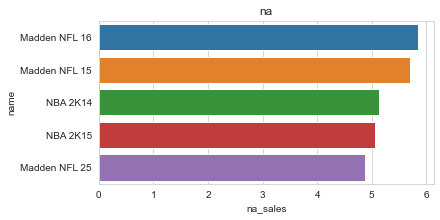

name
FIFA 15         12.02
FIFA 16         11.09
FIFA 14         10.96
FIFA 17          8.74
Mario Kart 8     2.15
Name: eu_sales, dtype: float64

85.49000000000001

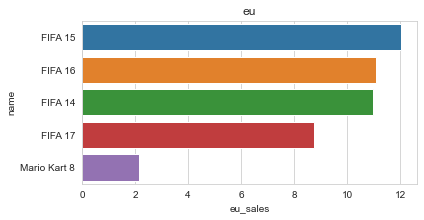

name
Animal Crossing: Happy Home Designer    1.40
Mario Kart 8                            1.28
Luigi's Mansion: Dark Moon              1.11
Super Mario Maker                       0.94
Pro Evolution Soccer 2014               0.84
Name: jp_sales, dtype: float64

15.979999999999999

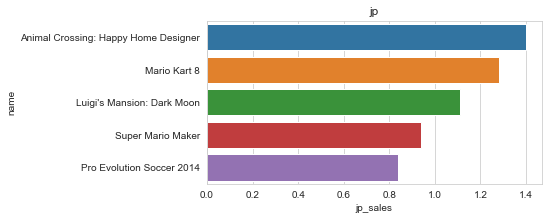

In [245]:
e_release = df.query('rating == "E"')
for region in regions:
    region_top = e_release.groupby('name')[region].sum().sort_values(ascending=False) #группируем по рейтингу и считаем продажи в регионе, сортируем по убыванию
    region_top_5 = region_top[0:5]  #смотрим топ-5
    display(region_top_5)
    display(region_top.sum())   #покажем сумму всех продаж
    plt.figure(figsize=(6,3))
    sns.barplot(y=region_top_5.index,x=region_top_5)
    plt.title(region[0:2])
    plt.show()

Интересно что топ-5 игр категории E для американского и европйского рынка (детские или для всех) это спортивные симуляторы. И только один спортивный симулятор среди топ-5 семейных игр на японском рынке

#### Краткий портрет:
EU, NA: Взрослый/подросток. Быстро переходят на современные платформы. Любимые современные PS и Xbox, любят Action и Shooter, а также спортивные симуляторы

JP: Популярны мобильные платформы - 3DS, Любимый жанр Ролевые игры. Наиболее популярны продукты для местного рынка (домашние)

<a id='section5'></a>
#### 5 Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

##### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H0 - средние пользовательские рейтинги платформ Xbox One и PС равны
H1 - средние пользовательские рейтинги не равны

In [253]:
xone_rating = df.query('platform == "XOne"')['user_score'].dropna()
pc_rating = df.query('platform == "PC" ')['user_score'].dropna()

alpha = 0.05  # зададим стандартный порог значимости

results = st.ttest_ind(xone_rating, pc_rating, equal_var=False)

print('p-значение:', results.pvalue)
if results.pvalue > alpha:
    print('не получилось отвергнуть гипотезу H0(формулировка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')
else:
    print('отвергаем нулевую гипотезу')

p-значение: 0.038056752824864336
отвергаем нулевую гипотезу


##### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые
H1 - Средние пользовательские рейтинги жанров Action и Sports разные

In [254]:
action_rating = df.query('genre == "Action"')['user_score'].dropna()
sports_rating = df.query('genre == "Sports" ')['user_score'].dropna()

alpha = 0.05  # зададим статндартный порог

results = st.ttest_ind(action_rating, sports_rating, equal_var=False)

print('p-значение:', results.pvalue)
if results.pvalue > alpha:
    print('не получилось отвергнуть H0 (гипотеза H0: Средние пользовательские рейтинги жанров Sports и Action одинаковые)')
else:
    print('отвергаем нулевую гипотезу, нет оснований утверждать что средние пользовательские рейтинги жанров Sports и Action одинаковые')

p-значение: 2.078555165233204e-25
отвергаем нулевую гипотезу, нет оснований утверждать что средние пользовательские рейтинги жанров Sports и Action одинаковые


<a id='section6'></a>
### 6 Общий вывод

Актуальными и растущими платформами на данный момент являются PlayStation4 и XboxOne. Перманентно актуальной является также платформа PC, однако уровень продаж релизов для PC относительно низкий (находится на 7-м месте), что не позволяет взять платформу в категорию целевых для продвижения . Для японского рынка платформа 3DS по сей день является самой популярной и ее не стоит сбрасывать со счетов, хотя платформа появилась в 2011 году и скорее всего в ближайшее время Nintendo выпустит что-то новое.

C точки зрения платформ фокус рекламных компаний на 2017 должен быть нацелен на PS4 и Xone. Для японского рынка - 3DS.

C точки зрения жанров для Европейского и Амеранского рынков стоит делать фокуc на продажу релизов жанров Shooter, Platform, следом спортивные и гоночные симуляторы и семейные игры.

Для японского рынка фокус на Role-playing и Fighting под мобильные платформы (3DS).

Не стоит сбрасывать со счетов жанр Action, несмотря на невысокий медианный уровень продаж данного жанра. По общим продажам он является лидером во всех регионах. Это значит что в жанре Action выходит очень большое количество игр, но как правило с невысокими продажами, однако тут встречаются и мировые хиты, которые нельзя упустить из виду


In [255]:
action = df.loc[df['genre'] == 'Action',['name','total_sales']].sort_values(by='total_sales', ascending=False)
action.head(50)

,name,total_sales
16,Grand Theft Auto V,21.05
23,Grand Theft Auto V,16.27
42,Grand Theft Auto V,12.62
149,The Last of Us,5.86
165,Grand Theft Auto V,5.47
224,The Last of Us,4.72
230,Uncharted: The Nathan Drake Collection,4.62
234,Luigi's Mansion: Dark Moon,4.59
294,Watch Dogs,4.05
303,Assassin's Creed: Unity,3.96
